In [50]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
from keras import utils
import numpy as np

batch_size = 128
num_classes = 10
epochs = 50

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = utils.normalize(x_train)
x_test = utils.normalize(x_test)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

num_train_samples = int(0.8*x_train.shape[0])

x_val = x_train[num_train_samples:,:]
y_val = y_train[num_train_samples:]

x_train = x_train[:num_train_samples,:]
y_train = y_train[:num_train_samples]



In [67]:
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val,y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 179us/step - loss: 0.7306 - acc: 0.8240 - val_loss: 0.3426 - val_acc: 0.9030
Epoch 2/50
48000/48000 [==============================] - 8s 158us/step - loss: 0.3372 - acc: 0.9029 - val_loss: 0.2792 - val_acc: 0.9190
Epoch 3/50
48000/48000 [==============================] - 8s 164us/step - 

In [68]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_val,y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.4913 - acc: 0.8732 - val_loss: 0.2172 - val_acc: 0.9364
Epoch 2/20
48000/48000 [==============================] - 5s 94us/step - loss: 0.1898 - acc: 0.9436 - val_loss: 0.1591 - val_acc: 0.9548
Epoch 3/20
48000/48000 [==============================] - 5s 96us/step - lo

In [95]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(784,)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val,y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_30 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                330       
Total para

In [97]:
import matplotlib.pyplot as plt

def plot_graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

Below are the graphs "Accuracy vs Epoch" and "Loss vs Epoch" graphs for the best model - "model 1"


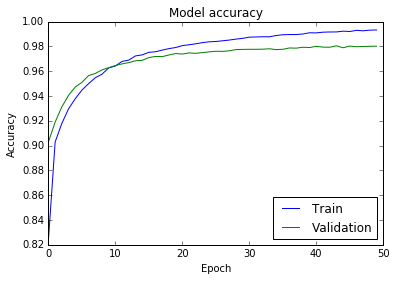

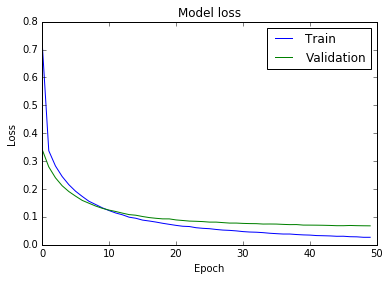

In [98]:
print("Below are the graphs \"Accuracy vs Epoch\" and \"Loss vs Epoch\" graphs for the best model - \"model 1\"")
plot_graph(history)

In [89]:
result = model1.evaluate(x_test, y_test, batch_size = 128)

10000/10000 [==============================] - 0s 46us/step


In [93]:
print("The accuracy of the best model is: ", result[1]*100, "%")
print("The loss of the best model is: ", result[0])

The accuracy of the best model is:  98.05 %
The loss of the best model is:  0.06227365946667269
